In [2]:
%load_ext autoreload
%autoreload 2

import sys 
sys.path.append('/global/project/projectdirs/desi/mocks/bgs/MXXL/one_percent')
import footprint 
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/global/homes/l/lbigwood/S4Mock/')
#import mxxl_real
from astropy.table import Table
from corr_func_tools import calc_wtheta,create_axes
import mxxl_real2
import S4Mock_io
from   desitarget.sv3.sv3_targetmask import desi_mask, bgs_mask, mws_mask

In [50]:
mxxl = mxxl_real2.read_mxxl_real()

"""
for i in range(36):
    mxxl_temp=mxxl[(mxxl['NMOCK']==i)]
    plt.scatter(mxxl_temp['RA'][:1000000], mxxl_temp['DEC'][:1000000],s=10, edgecolor="None")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.title('MXXL')
"""

'\nfor i in range(36):\n    mxxl_temp=mxxl[(mxxl[\'NMOCK\']==i)]\n    plt.scatter(mxxl_temp[\'RA\'][:1000000], mxxl_temp[\'DEC\'][:1000000],s=10, edgecolor="None")\n    plt.xlabel(\'RA\')\n    plt.ylabel(\'DEC\')\n    plt.title(\'MXXL\')\n'

In [51]:
rand = mxxl_real2.read_mxxl_real_rand()

"""
for i in range(36):
    rand_temp=rand[(rand['NMOCK']==i)]
    plt.scatter(rand_temp['RA'][:1000000], rand_temp['DEC'][:1000000],s=10, edgecolor="None")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.title('Randoms')
"""

'\nfor i in range(36):\n    rand_temp=rand[(rand[\'NMOCK\']==i)]\n    plt.scatter(rand_temp[\'RA\'][:1000000], rand_temp[\'DEC\'][:1000000],s=10, edgecolor="None")\n    plt.xlabel(\'RA\')\n    plt.ylabel(\'DEC\')\n    plt.title(\'Randoms\')\n'

In [52]:
mxxl = mxxl[(mxxl['APP_MAG']>18)&(mxxl['APP_MAG']<19)]
#19.5952

In [53]:
wtheta_all = []
for i in range(36):
    print(i)
    
    mxxl_n = mxxl[(mxxl['NMOCK']==i)]
    rand_n = rand[(rand['NMOCK']==i)]
    wtheta_all.append(calc_wtheta(mxxl_n['RA'],mxxl_n['DEC'],rand_n['RA'],rand_n['DEC']))
wtheta_all = np.c_[wtheta_all]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [56]:
#np.save('wtheta_all',wtheta_all)
wtheta_all = np.load('wtheta_all.npy')

In [54]:
mean = np.mean(wtheta_all,axis=0)
stdev = np.std(wtheta_all,axis=0)

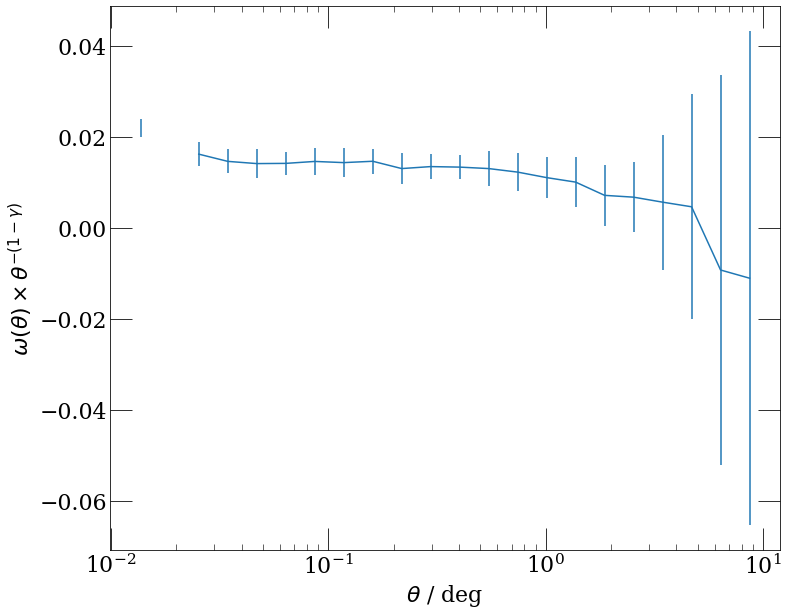

In [55]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

x_axis,y_axis = create_axes(mean)
x_axis,y_axis_err = create_axes(stdev)

plt.errorbar(x_axis,y_axis,yerr=y_axis_err)

plt.xlabel(r'$\theta$ / deg')
plt.ylabel(r'$\omega (\theta)\times \theta^{-(1-\gamma)}$')
plt.xscale('log')
#plt.yscale('log')

In [ ]:
mock = S4Mock_io.read_mxxl(small=False)
bright_mock = mock[(mock['APP_MAG'] <= 19.5)]

bright_mock =bright_mock[(bright_mock['RA']>240)&(bright_mock['RA']<260)& (bright_mock['DEC']>10)&(bright_mock['DEC']<30)]

ra_rand = np.random.uniform(240,260,1000000)
dec_rand = np.random.uniform(10,30,1000000)

ra_rand = ra_rand.astype('float32')
dec_rand = dec_rand.astype('float32')

In [ ]:
import geometry
import healpy as hp
target_pixel_density = geometry.targ_hpmap(bright_mock)
hp.mollview(target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='MXXL')
hp.graticule(dpar=5, dmer=5)

In [ ]:
pix = geometry.radec2pix(ra_rand,dec_rand, nside=32)
    
#indice of filled pixels and corrosponding targets in pixel
filled_pixel_index, filled_targets_per_pixel = np.unique(pix, return_counts=True) 

#no. targets per pixel, initially 0 
target_pixel_density = np.zeros(hp.nside2npix(32))

#update no. targets per pixel 
target_pixel_density[filled_pixel_index] = filled_targets_per_pixel 
target_pixel_density[target_pixel_density == 0] = np.NaN
hp.mollview(target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)

In [ ]:
p = calc_wtheta(bright_mock['RA'].data,bright_mock['DEC'].data,ra_rand,dec_rand)

In [ ]:
np.save('wtheta_main_mock',p)

In [22]:
wtheta_all = np.load('/global/u2/l/lbigwood/S4Mock/docs/nb/wtheta_all.npy')
mean = np.mean(wtheta_all,axis=0)
stdev = np.std(wtheta_all,axis=0)

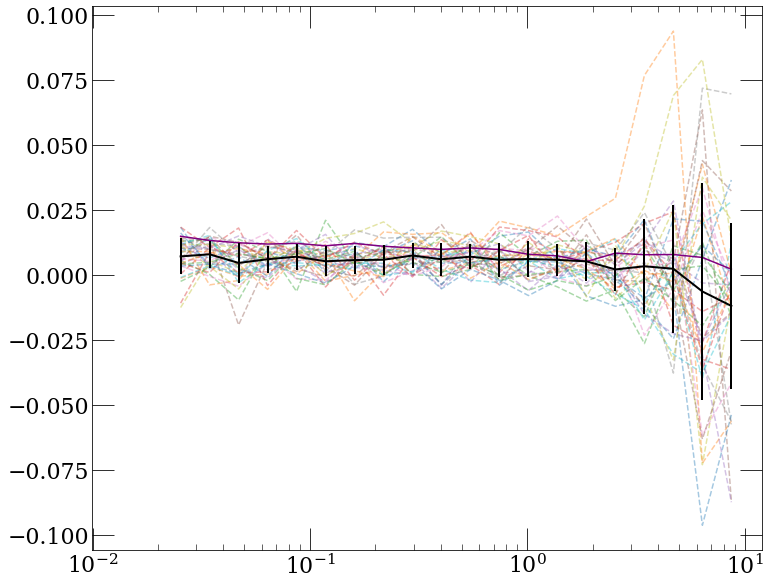

In [25]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)


#mxxl all
x_axis1,y_axis1 = create_axes(wtheta_all[0])
plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',label='MXXL realisations (1-36)')


for i in range(1,len(wtheta_all)):
    x_axis1,y_axis1 = create_axes(wtheta_all[i])
    plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed')

    
x_axis1,y_axis1 = create_axes(mean)
x_axis1,y_axis_err = create_axes(stdev)

plt.errorbar(x_axis1[10:],y_axis1[10:],yerr=y_axis_err[10:],color= 'black',label='MXXL',zorder=3,linewidth=2)

x_axis,y_axis = create_axes(p)
plt.plot(x_axis,y_axis,color='purple')


plt.xscale('log')

In [27]:
np.save('wtheta_main_mock',p)